In [90]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
iris_data = load_iris() # load the iris data set

In [118]:
print("Keys: {}".format(iris_data.keys())) 
print("Target Names: {}".format(iris_data.target_names))
print("Features: {}".format(iris_data.feature_names))

Keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Target Names: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [119]:
print("Data: {}".format(iris_data.data))

Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

In [120]:
# Shape of the data
iris_data.data.shape

(150, 4)

In [121]:
iris_data.data[:5] # First five instances

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [122]:
# Split the data into training & test data
from sklearn.model_selection import train_test_split
[x_train, x_test, y_train, y_test] = train_test_split(iris_data.data, iris_data.target, random_state=0)

In [123]:
iris_df = pd.DataFrame(x_train, columns=iris_data.feature_names)

In [124]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


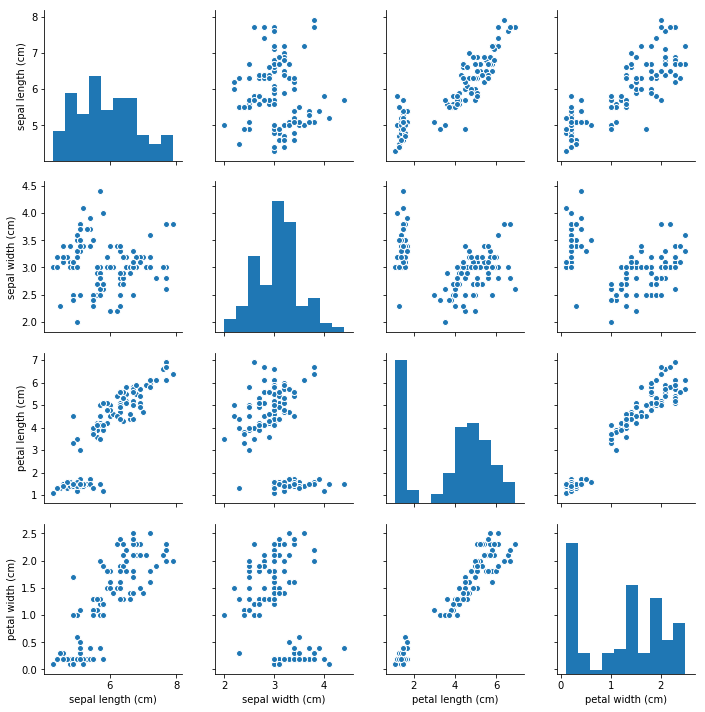

In [125]:
sns.pairplot(data=iris_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bb20f98>,
      dtype=object)

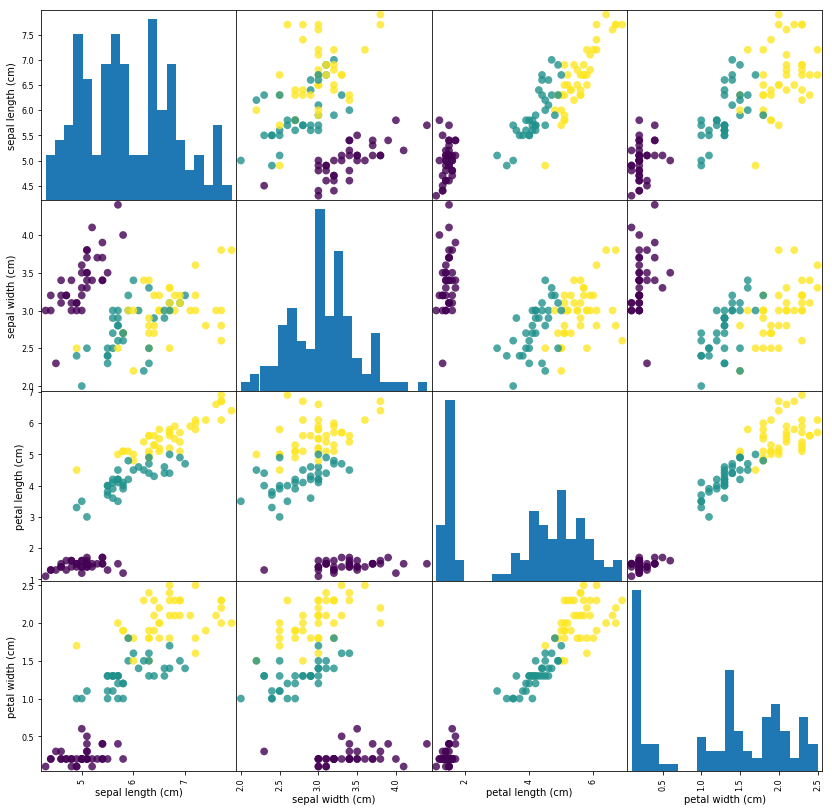

In [126]:
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(14,14), marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier(n_neighbors=1)

In [129]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [130]:
y_pred = knn.predict(x_test)

In [135]:
print("Model accuracy: {}%".format(knn.score(x_test, y_test)*100))

Model accuracy: 97.36842105263158%


In [136]:
# New data entry

x_new = np.array([[5, 2.9, 1, 0.2]])
x_new

array([[5. , 2.9, 1. , 0.2]])

In [137]:
print("Prediction Enum: {}".format(knn.predict(x_new)))
print("Predicted Target: {}".format(iris_data['target_names'][knn.predict(x_new)]))

Prediction Enum: [0]
Predicted Target: ['setosa']


In [138]:
x_new = np.array([[6.9, 3,  5.1, 2.8]])
print("Prediction Enum: {}".format(knn.predict(x_new)))
print("Predicted Target: {}".format(iris_data['target_names'][knn.predict(x_new)]))

Prediction Enum: [2]
Predicted Target: ['virginica']


In [139]:
iris_data['target_names'][iris_data['target'][0]]

'setosa'